In [1]:
import tensorflow as tf               # TesorFlow
import numpy as np                    # NumPy
import matplotlib.pyplot as plt       # Графики-то строить будем
import pandas as pd                   # Для работы с таблицами и CSV-файлами
import sklearn.metrics                # Для построения confusion matrix
import seaborn as sns                 # Для отображения confusion matrix
import os                             # Для возможности выбора GPU

import sklearn.decomposition          # Понадобится для SVD-разложений
import sklearn.metrics                # Понадобится для оценки разложений

In [2]:
# Используем GPU 0
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Отключаем отладочные сообщения в TensorFlow
tf.get_logger().setLevel('ERROR')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

In [3]:
DATASET_DIR = '/opt/datasets/movielens'

In [4]:
df = pd.read_csv(DATASET_DIR + '/ratings.csv')
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
utility_matrix = df.pivot(index="movieId", columns="userId", values='rating').fillna(0)
utility_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


![alt text](https://miro.medium.com/max/720/0*TIp1NS_fHguLx1mn.png "Title")

![alt text](https://miro.medium.com/max/640/0*lB7TP90s4s-JJT9u)

![alt text](https://miro.medium.com/max/720/1*FfF24cL1TLT4fdu3CAciHA.png)

![alt text](https://miro.medium.com/max/640/1*gomd5YFOrW2SJmnHSNCEXg.png)

In [6]:
model = sklearn.decomposition.TruncatedSVD()
model.n_components = 3

In [7]:
model.fit(utility_matrix)
W = model.transform(utility_matrix)
H = model.components_

In [8]:
print('Utility Matrix: {}'.format(utility_matrix.shape))
print('W: {}'.format(W.shape))
print('H: {}'.format(H.shape))

Utility Matrix: (9724, 610)
W: (9724, 3)
H: (3, 610)


In [9]:
reconstructed_matrix = np.dot(W, H)
reconstructed_matrix

array([[ 2.64791183e+00,  1.73667552e-01,  3.84194818e-02, ...,
         4.59313742e+00,  9.69395463e-01,  2.55339449e+00],
       [ 1.29163425e+00,  1.60162434e-01,  1.02215895e-02, ...,
         2.50283822e+00,  5.94525958e-01,  1.76016060e+00],
       [ 8.62154178e-01, -3.63581223e-02,  1.74293216e-02, ...,
         1.08859917e+00,  2.79878995e-01, -2.91757237e-01],
       ...,
       [-6.78037596e-03,  2.58086646e-03, -2.10487485e-04, ...,
         2.21518297e-03, -2.30320399e-03,  3.42667375e-02],
       [-6.78037596e-03,  2.58086646e-03, -2.10487485e-04, ...,
         2.21518297e-03, -2.30320399e-03,  3.42667375e-02],
       [-9.82222643e-03,  6.17423263e-03, -4.52061800e-04, ...,
         1.36029407e-02, -2.02725857e-03,  7.74872863e-02]])

In [10]:
reconstructed_matrix[reconstructed_matrix < 0] = 0

In [11]:
df_rm = pd.DataFrame(np.round(reconstructed_matrix, 2), columns=utility_matrix.columns, index=utility_matrix.index)
df_rm

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,2.65,0.17,0.04,1.05,1.31,3.74,1.66,1.73,0.19,0.50,...,1.12,2.86,2.13,1.68,1.47,2.57,2.34,4.59,0.97,2.55
2,1.29,0.16,0.01,0.32,0.77,2.19,1.02,1.05,0.10,0.40,...,0.80,1.69,0.22,1.00,0.90,0.82,1.22,2.50,0.59,1.76
3,0.86,0.00,0.02,0.47,0.40,1.17,0.33,0.51,0.04,0.00,...,0.04,0.88,1.25,0.51,0.30,0.88,0.75,1.09,0.28,0.00
4,0.09,0.00,0.00,0.03,0.07,0.21,0.04,0.09,0.00,0.00,...,0.00,0.16,0.04,0.09,0.04,0.00,0.09,0.07,0.05,0.00
5,0.55,0.01,0.01,0.18,0.36,1.04,0.32,0.48,0.02,0.04,...,0.13,0.79,0.29,0.47,0.29,0.22,0.54,0.78,0.27,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
193583,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03
193585,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03


In [12]:
def sparsity(data):
    return 1.0 - np.count_nonzero(data) / data.size

def rel_spars(data1, data2):
    #print(sparsity(data1))
    #print(sparsity(data2))
    return (sparsity(data1) - sparsity(data2))

In [13]:
MSE_val = sklearn.metrics.mean_squared_error(utility_matrix, reconstructed_matrix)
MAE_val = sklearn.metrics.mean_absolute_error(utility_matrix, reconstructed_matrix)
EVS_val = sklearn.metrics.explained_variance_score(utility_matrix, reconstructed_matrix)
SPARS_val = rel_spars(utility_matrix, reconstructed_matrix)

print('MSE: {}'.format(MSE_val))
print('MAE: {}'.format(MAE_val))
print('EVS: {}'.format(EVS_val))
print('SPARS: {}'.format(SPARS_val))

MSE: 0.1628230777612288
MAE: 0.09550094999402964
EVS: 0.16969030166821553
SPARS: 0.6711722221847584


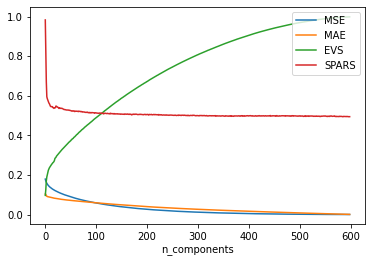

In [15]:
MSE = []
MAE = []
EVS = []
SPARS = []

for k in range(1,600):
    model = sklearn.decomposition.TruncatedSVD()
    model.n_components = k
    model.fit(utility_matrix)
    W = model.transform(utility_matrix)
    H = model.components_
    reconstructed_matrix = np.dot(W, H)
    reconstructed_matrix[reconstructed_matrix < 0] = 0
    MSE_val = sklearn.metrics.mean_squared_error(utility_matrix, reconstructed_matrix)
    MAE_val = sklearn.metrics.mean_absolute_error(utility_matrix, reconstructed_matrix)
    EVS_val = sklearn.metrics.explained_variance_score(utility_matrix, reconstructed_matrix)
    SPARS_val = rel_spars(utility_matrix, reconstructed_matrix)
    MSE.append(MSE_val)
    MAE.append(MAE_val)
    EVS.append(EVS_val)
    SPARS.append(SPARS_val)
    
plt.plot(MSE)
plt.plot(MAE)
plt.plot(EVS)
plt.plot(SPARS)
plt.legend(['MSE', 'MAE', 'EVS', 'SPARS'], loc='upper right')
plt.xlabel('n_components')
plt.show()